In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Importação dos dados

In [2]:
base = pd.read_csv('dados/BRAZIL_CITIES.csv', sep=';', decimal=',')

In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 81 columns):
CITY                      5576 non-null object
STATE                     5576 non-null object
CAPITAL                   5576 non-null int64
IBGE_RES_POP              5568 non-null float64
IBGE_RES_POP_BRAS         5568 non-null float64
IBGE_RES_POP_ESTR         5568 non-null float64
IBGE_DU                   5566 non-null float64
IBGE_DU_URBAN             5566 non-null float64
IBGE_DU_RURAL             5495 non-null float64
IBGE_POP                  5568 non-null float64
IBGE_1                    5568 non-null float64
IBGE_1-4                  5568 non-null float64
IBGE_5-9                  5568 non-null float64
IBGE_10-14                5568 non-null float64
IBGE_15-59                5568 non-null float64
IBGE_60+                  5568 non-null float64
IBGE_PLANTED_AREA         5573 non-null float64
IBGE_CROP_PRODUCTION_$    5573 non-null float64
IDHM Ranking 2010         5568 no

De acordo com a descrição encontrada no Kaggle e com a quantidade de valores nulos, selecionei algumas colunas para entrar na analise

In [4]:
colunas = [
    'CITY', 'CAPITAL', 'IBGE_POP', 'IBGE_PLANTED_AREA', 'IDHM', 'ALT',  'AREA', 'Pu_Bank'
]

In [5]:
base[colunas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 8 columns):
CITY                 5576 non-null object
CAPITAL              5576 non-null int64
IBGE_POP             5568 non-null float64
IBGE_PLANTED_AREA    5573 non-null float64
IDHM                 5568 non-null float64
ALT                  5567 non-null float64
AREA                 5574 non-null float64
Pu_Bank              3345 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 348.6+ KB


Algumas variaveis irei preencher os valores nulo com zero para indicar que ela não possui a caracteristica, enquanto outras colunas que deveriam estar todas preenchidas vou preencher com a média.
Tambem irei renomear as colunas para que todas sigam um mesmo padrão

In [6]:
base['CAPITAL'] = base['CAPITAL'].fillna(base['CAPITAL'].median())
base['IBGE_POP'] = base['IBGE_POP'].fillna(base['IBGE_POP'].median())
base['IBGE_PLANTED_AREA'] = base['IBGE_PLANTED_AREA'].fillna(base['IBGE_PLANTED_AREA'].median())
base['IDHM'] = base['IDHM'].fillna(base['IDHM'].median())
base['ALT'] = base['ALT'].fillna(base['ALT'].median())
base['AREA'] = base['AREA'].fillna(base['AREA'].median())
base['PU_BANK'] = base['Pu_Bank'].fillna(0)

In [7]:
colunas = [
    'CITY', 'CAPITAL', 'IBGE_POP', 'IBGE_PLANTED_AREA', 'IDHM', 'ALT',  'AREA', 'PU_BANK'
]

Analisando a correlação entre as variaveis'

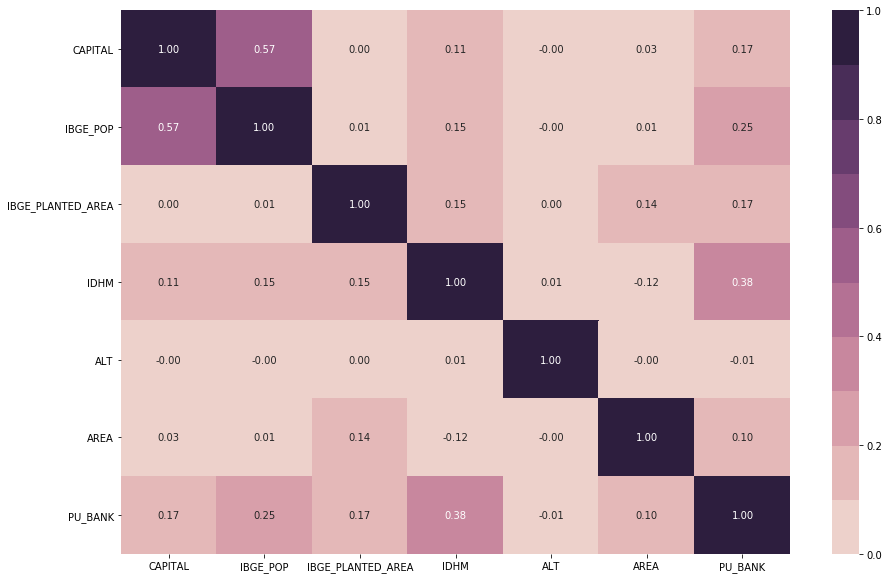

In [8]:
plt.figure(figsize=[15, 10])
sns.heatmap(base[colunas].corr(), annot=True, fmt='.2f', vmax=1, vmin=0, cmap=sns.cubehelix_palette(10))
plt.show()

Analisando as distribuições das variaveis

Maximo: 1
Minimo: 0
Media: 0.0
Mediana: 0.0


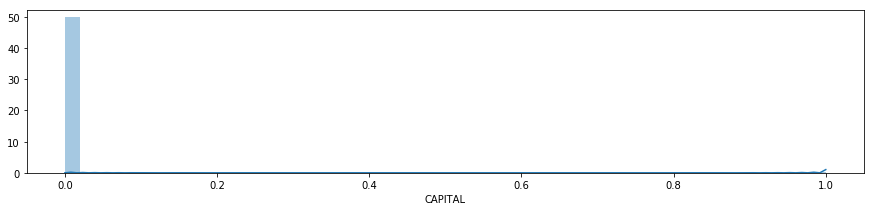

Maximo: 10463636.0
Minimo: 174.0
Media: 6177.0
Mediana: 6177.0


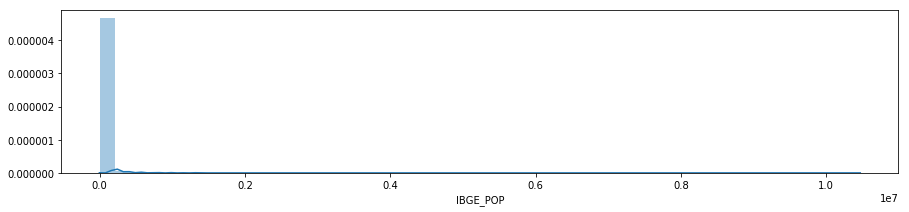

Maximo: 1205669.0
Minimo: 0.0
Media: 3473.0
Mediana: 3473.0


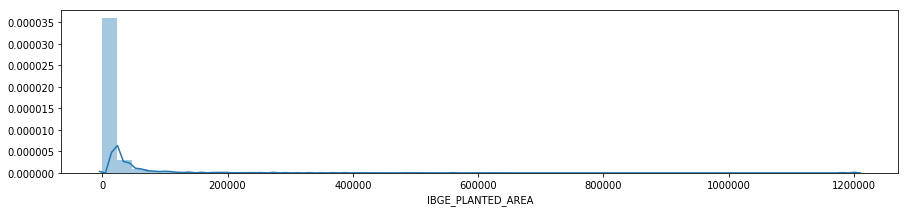

Maximo: 0.862
Minimo: 0.418
Media: 0.665
Mediana: 0.665


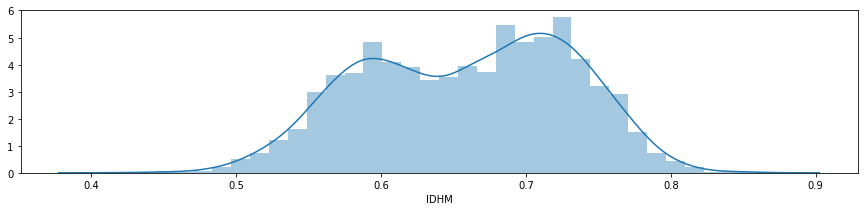

Maximo: 874579.0
Minimo: 0.0
Media: 406.51
Mediana: 406.51


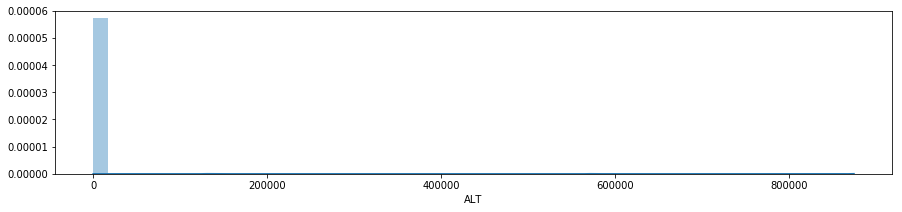

Maximo: 159533328.0
Minimo: 26.1
Media: 296000.0
Mediana: 296000.0


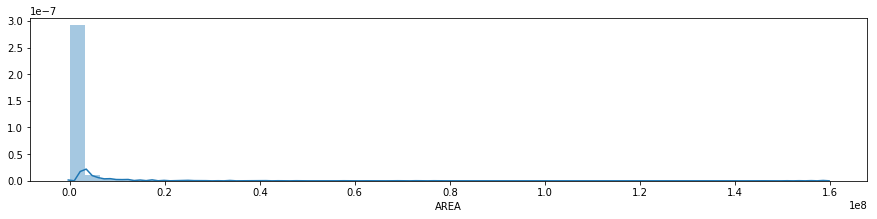

Maximo: 8.0
Minimo: 0.0
Media: 1.0
Mediana: 1.0


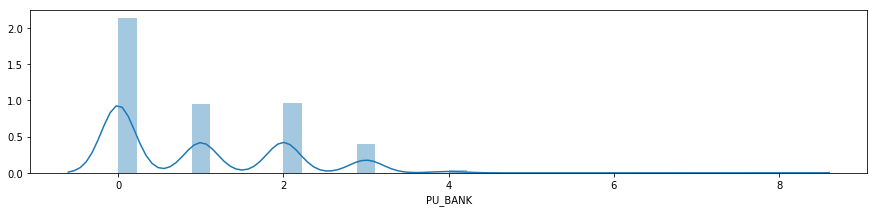

In [9]:
for coluna in base[colunas].drop('CITY', axis=1).columns:
    print('Maximo: ' + str(max(base[coluna])))
    print('Minimo: ' + str(min(base[coluna])))
    print('Media: ' + str(np.median(base[coluna])))
    print('Mediana: ' + str(np.median(base[coluna])))

    plt.figure(figsize=[15, 3])
    sns.distplot(base[coluna])
    plt.show()

In [10]:
base[colunas].to_csv('dados/base_cidades.csv', index=False)